## Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

%matplotlib inline

## Loading Data

In [2]:
df = pd.read_csv('crash_report.csv')

## Dropping useless columns

In [3]:
df.drop(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'RD_NO', 'REPORT_TYPE', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'WORKERS_PRESENT_I', 'INJURIES_UNKNOWN', 'LONGITUDE', 'LATITUDE', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
         'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'CRASH_TYPE', 'STREET_DIRECTION', 'NUM_UNITS', 'DAMAGE', 'DATE_POLICE_NOTIFIED', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'], axis=1, inplace=True)

In [4]:
df['datetime'] = pd.to_datetime(df['CRASH_DATE'])

## Adding date and time to dataframe

In [5]:
df['CRASH_MONTH'] = df['datetime'].dt.month
df['CRASH_DAY_OF_WEEK'] = df['datetime'].dt.day
df['CRASH_HOUR'] = df['datetime'].dt.hour

## Dropping rows with values

In [6]:
df.drop(['LOCATION', 'datetime', 'CRASH_DATE'], axis=1, inplace=True)

In [7]:
list_unwanted = [3, 9, 99, 39, 1, 2, 32, 33, 6, 24, 11, 34, 18, 12, 36, 7, 14, 16, 38, 31, 22, 23, 63, 4, 26]
for n in list_unwanted:
    df.drop(index=df[df['POSTED_SPEED_LIMIT'] == n].index, inplace=True)

In [8]:
df['LANE_CNT'].fillna(0, inplace = True)
df.fillna('UNKNOWN', inplace=True)

## One Hot Encoding the Target Variable

In [9]:
# Encoding our target variable
ohe = OneHotEncoder(handle_unknown='ignore')

crash_type = df['FIRST_CRASH_TYPE']

crash_df = pd.DataFrame(crash_type, columns=['FIRST_CRASH_TYPE'])

crash_df = pd.DataFrame(ohe.fit_transform(crash_df[['FIRST_CRASH_TYPE']]).toarray())

crash_df.columns = df['FIRST_CRASH_TYPE'].unique()

## Label Encoding categorical data

In [10]:
# Choosing what columns will be label encoded
used_col = ['TRAFFIC_CONTROL_DEVICE', 'HIT_AND_RUN_I',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
        'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE']

encoder = LabelEncoder()
label_df = pd.DataFrame()
for x in used_col:
    label_df[x] = encoder.fit_transform(df[x])

In [11]:
# Merging the two different data frames
df2 = pd.merge(crash_df, label_df, left_index=True, right_index=True)

## Choosing Features

In [12]:
df2['CRASH_HOUR'] = df['CRASH_HOUR']
df2['CRASH_DAY_OF_WEEK'] = df['CRASH_DAY_OF_WEEK']
df2['CRASH_MONTH'] = df['CRASH_MONTH']

In [13]:
df2.drop(index=df2[df2['CRASH_MONTH'].isna() == True].index, inplace=True)

In [14]:
y = df2['REAR END']
X = df2.drop(['REAR END', 'ANGLE', 'SIDESWIPE SAME DIRECTION', 'PEDESTRIAN',
       'PARKED MOTOR VEHICLE', 'TURNING', 'HEAD ON', 'PEDALCYCLIST',
       'SIDESWIPE OPPOSITE DIRECTION', 'OTHER NONCOLLISION', 'FIXED OBJECT',
       'OTHER OBJECT', 'REAR TO FRONT', 'REAR TO SIDE', 'REAR TO REAR',
       'TRAIN', 'OVERTURNED', 'ANIMAL'], axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

## Random Forest Classifier model on Encoded data

In [16]:
rfr = RandomForestClassifier(random_state=42)

In [17]:
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

In [18]:
roc_auc_score(y_test, y_pred)

0.6686708095028596

## Visualsing Data

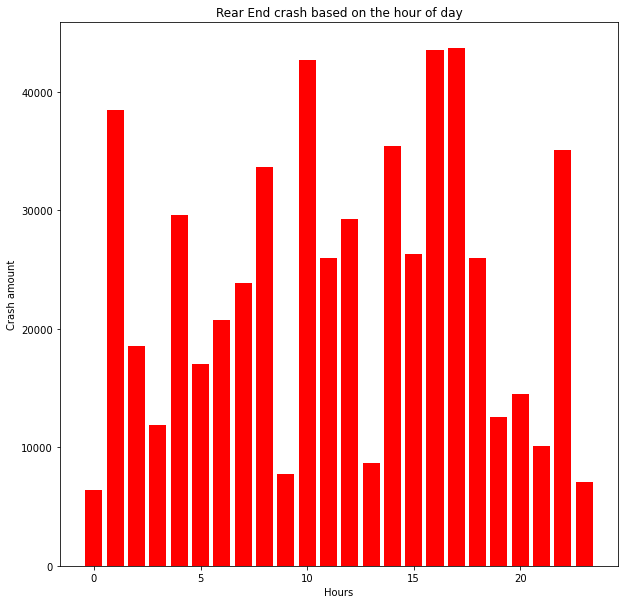

In [19]:
y = df['CRASH_HOUR'].value_counts()
x = df['CRASH_HOUR'].unique()
fig = plt.figure(figsize=(10,10))

plt.bar(x, y, color='r')
plt.title('Rear End crash based on the hour of day')
plt.xlabel('Hours')
plt.ylabel('Crash amount');

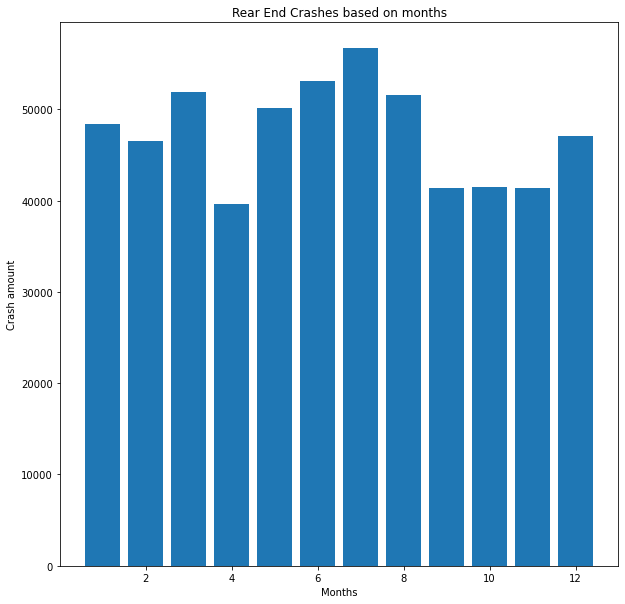

In [20]:
y = df['CRASH_MONTH'].value_counts()
x = df['CRASH_MONTH'].unique()
fig = plt.figure(figsize=(10,10))

plt.bar(x, y)
plt.title('Rear End Crashes based on months')
plt.xlabel('Months')
plt.ylabel('Crash amount');

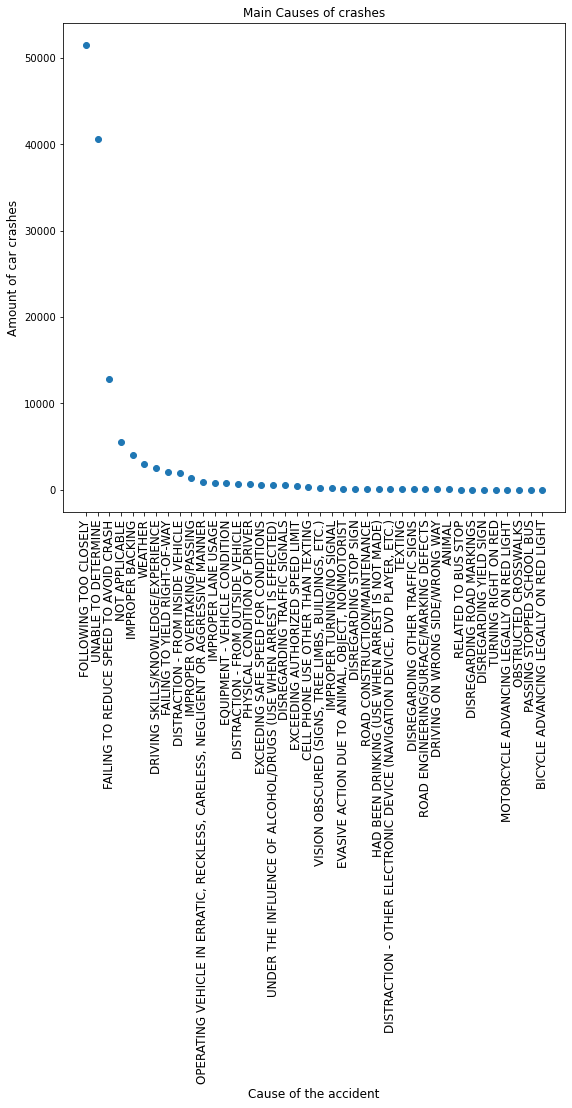

In [21]:
rear_end = df[df['FIRST_CRASH_TYPE'] == 'REAR END']

y = rear_end['PRIM_CONTRIBUTORY_CAUSE'].value_counts().values
x = rear_end['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index
fig = plt.figure(figsize=(9,9))
plt.scatter(x, y)
plt.title('Main Causes of crashes', fontsize=12)
plt.ylabel('Amount of car crashes', fontsize=12)
plt.xlabel('Cause of the accident', fontsize=12)
plt.xticks(rotation=90, fontsize=12);